In [2]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(os.getcwd())

d:\Desktop\FY\Research trends\atd_cnn\notebooks


In [4]:
os.chdir(r'd:\Desktop\FY\Research trends\atd_cnn')

### Paths for training and validation data

In [5]:
train_data_dir = "data/train/"
valid_data_dir = "data/valid/"
views = ["sagittal", "coronal", "axial"]

# Load labels for training and validation
train_labels_abnormal = pd.read_csv(os.path.join(train_data_dir, "../train-abnormal.csv"), names=['nr', 'abnormal'])
train_labels_meniscus = pd.read_csv(os.path.join(train_data_dir, "../train-meniscus.csv"), names=['nr', 'meniscus'])
train_labels_acl = pd.read_csv(os.path.join(train_data_dir, "../train-acl.csv"), names=['nr', 'acl'])

valid_labels_abnormal = pd.read_csv(os.path.join(valid_data_dir, "../valid-abnormal.csv"), names=['nr', 'abnormal'])
valid_labels_meniscus = pd.read_csv(os.path.join(valid_data_dir, "../valid-meniscus.csv"), names=['nr', 'meniscus'])
valid_labels_acl = pd.read_csv(os.path.join(valid_data_dir, "../valid-acl.csv"), names=['nr', 'acl'])

# Merge labels
train_labels = train_labels_abnormal.merge(train_labels_meniscus, on='nr').merge(train_labels_acl, on='nr')
valid_labels = valid_labels_abnormal.merge(valid_labels_meniscus, on='nr').merge(valid_labels_acl, on='nr')

print("Training Labels Sample:")
display(train_labels.head())

print("Validation Labels Sample:")
display(valid_labels.head())


Training Labels Sample:


,nr,abnormal,meniscus,acl
0,0,1,0,0
1,1,1,1,1
2,2,1,0,0
3,3,1,1,0
4,4,1,0,0


Validation Labels Sample:


,nr,abnormal,meniscus,acl
0,1130,0,0,0
1,1131,0,0,0
2,1132,0,0,0
3,1133,0,0,0
4,1134,0,0,0


### Label Distribution:
Bar charts showing the count of abnormal, ACL tear, and meniscus tear labels for both training and validation datasets.

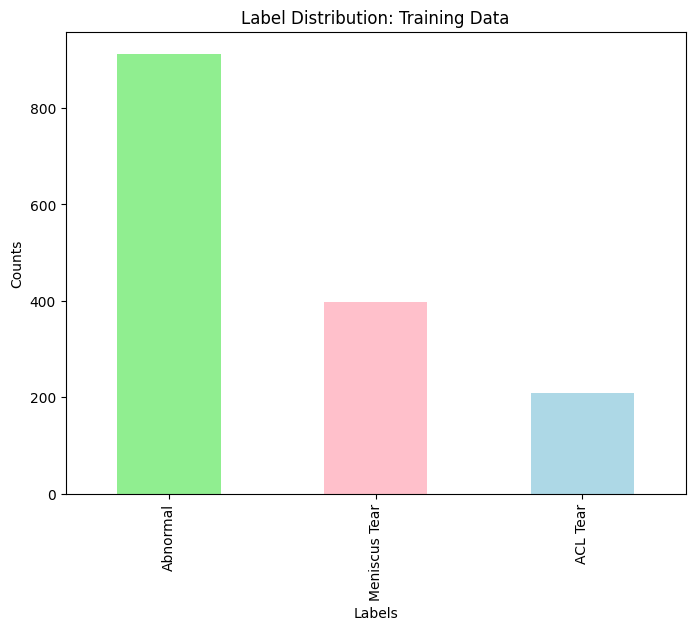

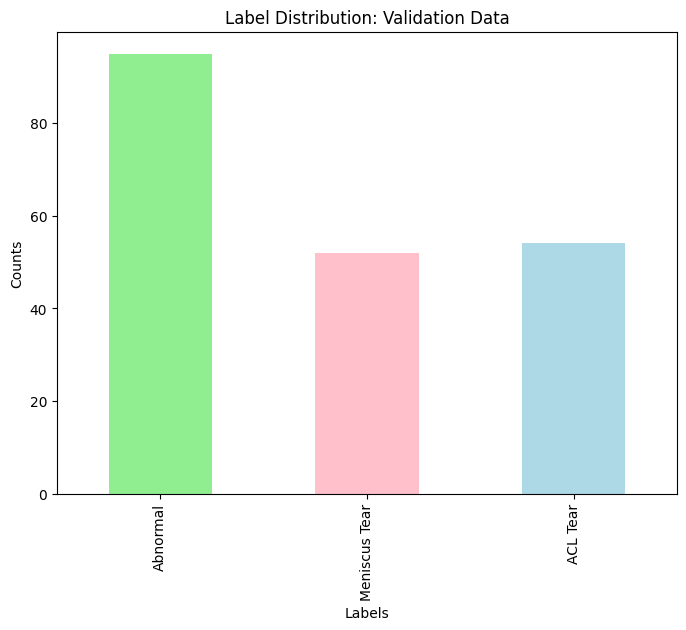

In [10]:
def plot_label_distributions(labels_df, title):
    labels_df[['abnormal', 'meniscus', 'acl']].sum().plot(kind='bar', figsize=(8, 6), color=['lightgreen', 'pink', 'lightblue'])
    plt.title(f"Label Distribution: {title}")
    plt.xlabel("Labels")
    plt.ylabel("Counts")
    plt.xticks(ticks=[0, 1, 2], labels=['Abnormal', 'Meniscus Tear', 'ACL Tear'])
    plt.show()

# Training Label Distribution
plot_label_distributions(train_labels, "Training Data")

# Validation Label Distribution
plot_label_distributions(valid_labels, "Validation Data")


### Slice Count Distribution

Histograms showing the number of slices per MRI exam for all views (sagittal, coronal, axial).

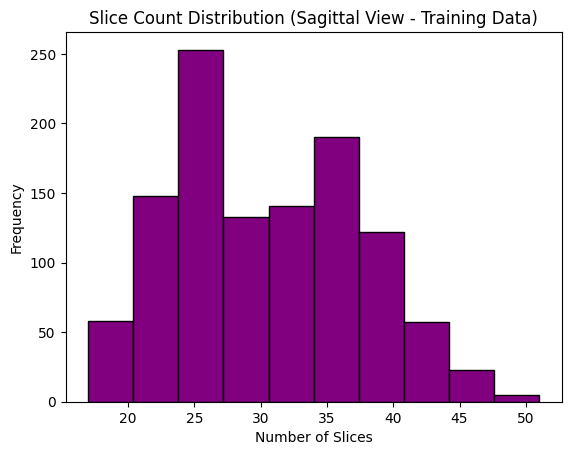

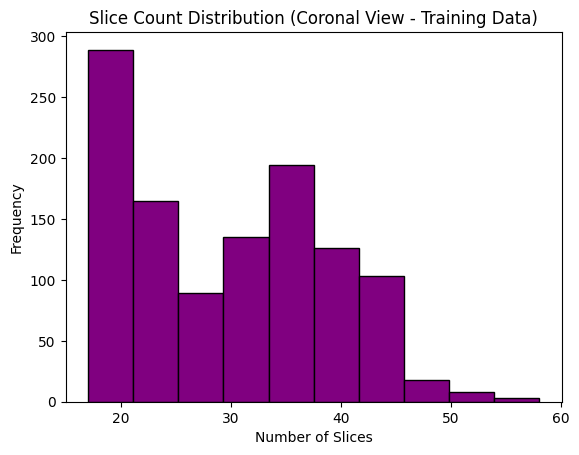

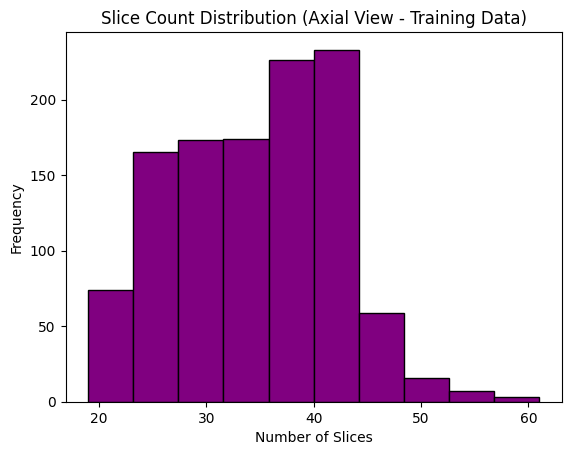

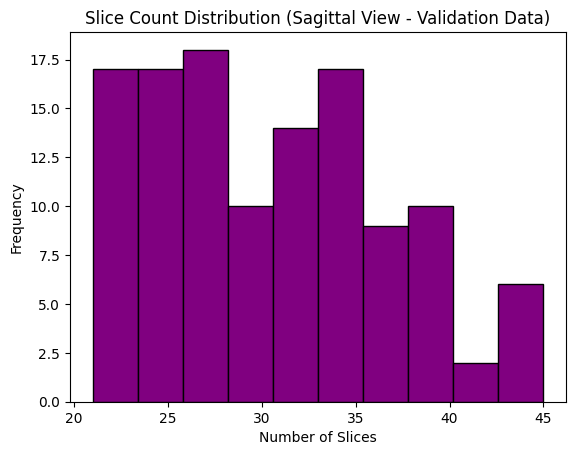

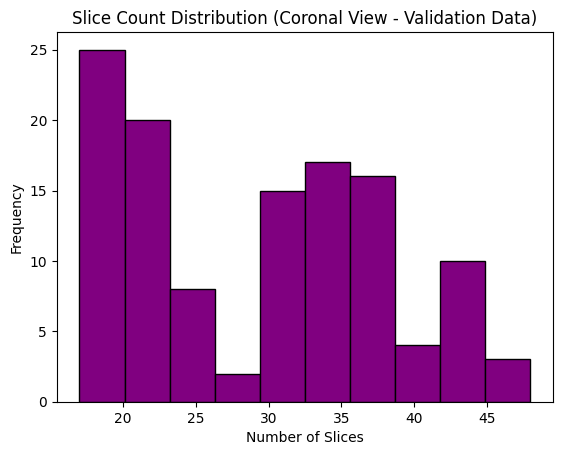

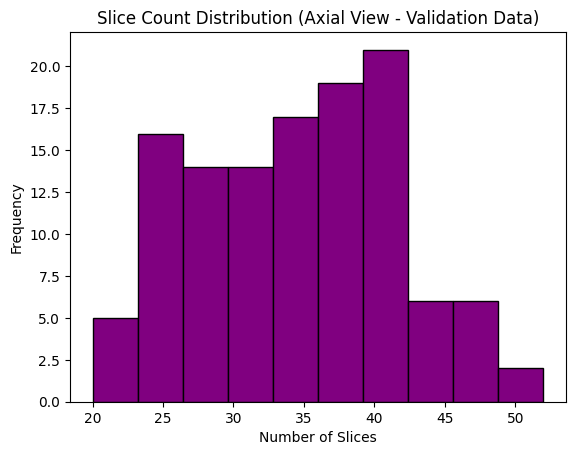

In [11]:
def analyze_slice_distribution(data_dir, view, title):
    slice_counts = []
    view_dir = os.path.join(data_dir, view)

    for exam_file in os.listdir(view_dir):
        exam_path = os.path.join(view_dir, exam_file)
        slices = np.load(exam_path)
        slice_counts.append(slices.shape[0])

    plt.hist(slice_counts, bins=10, color='purple', edgecolor='black')
    plt.title(f"Slice Count Distribution ({view.capitalize()} View - {title})")
    plt.xlabel("Number of Slices")
    plt.ylabel("Frequency")
    plt.show()

# Slice Count Distribution for Training Data
for view in views:
    analyze_slice_distribution(train_data_dir, view, "Training Data")

# Slice Count Distribution for Validation Data
for view in views:
    analyze_slice_distribution(valid_data_dir, view, "Validation Data")


### Pixel Intensity Analysis

Histograms showing the pixel intensity distributions for slices in each view.

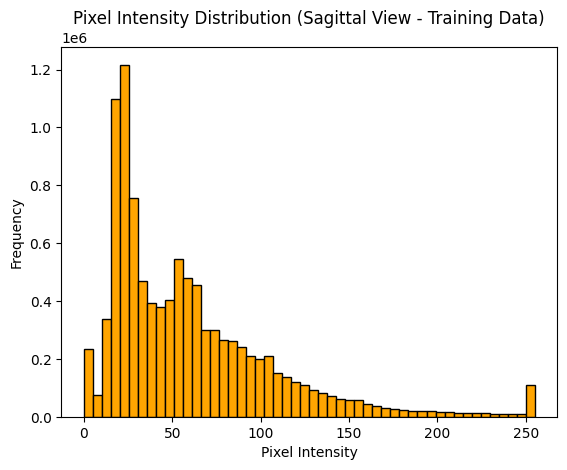

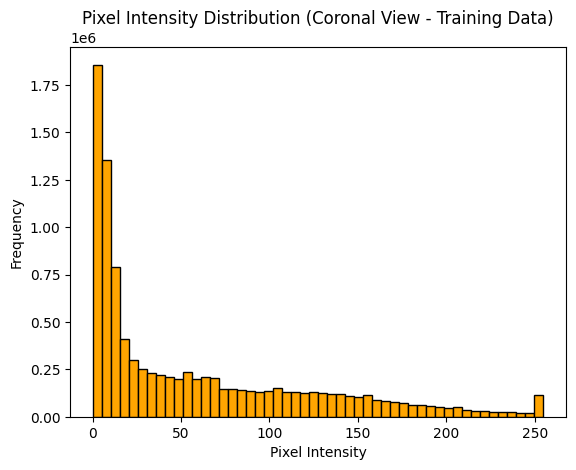

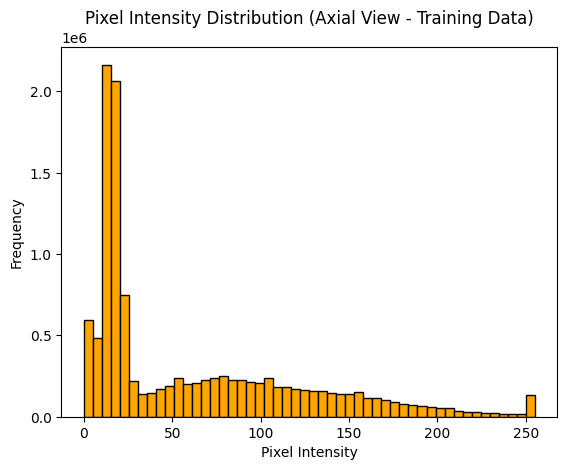

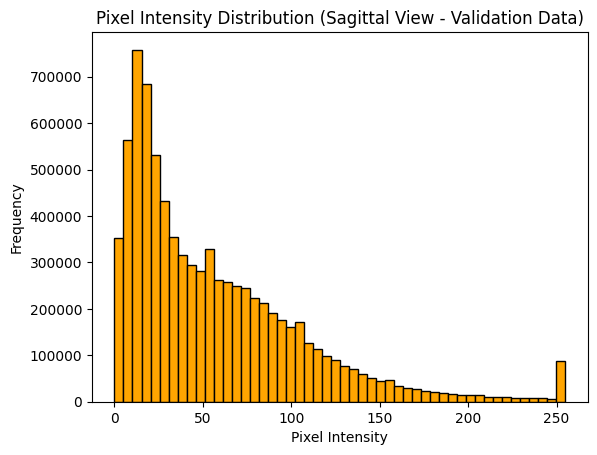

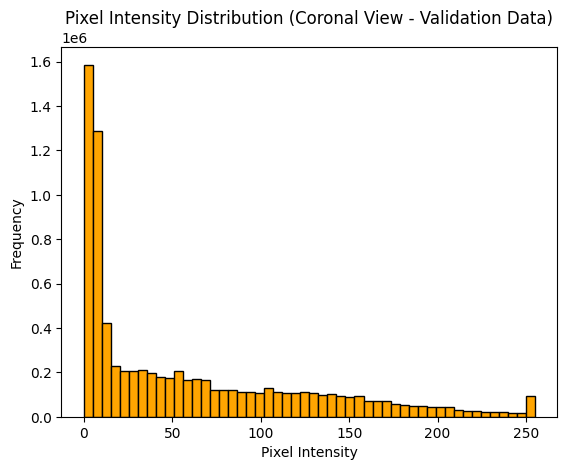

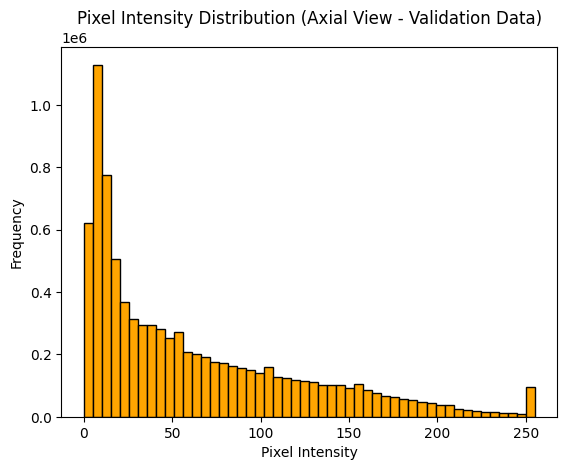

In [12]:
def pixel_intensity_analysis(data_dir, view, title, num_exams=5):
    view_dir = os.path.join(data_dir, view)
    intensities = []

    for i, exam_file in enumerate(os.listdir(view_dir)[:num_exams]):
        exam_path = os.path.join(view_dir, exam_file)
        slices = np.load(exam_path)
        intensities.extend(slices.flatten())

    plt.hist(intensities, bins=50, color='orange', edgecolor='black')
    plt.title(f"Pixel Intensity Distribution ({view.capitalize()} View - {title})")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Pixel Intensity Analysis for Training Data
for view in views:
    pixel_intensity_analysis(train_data_dir, view, "Training Data", num_exams=5)

# Pixel Intensity Analysis for Validation Data
for view in views:
    pixel_intensity_analysis(valid_data_dir, view, "Validation Data", num_exams=5)


### Label Correlation Analysis

Heatmaps and correlation matrices for abnormal, ACL tear, and meniscus tear labels.

Label Correlation Matrix: Training Data


,abnormal,meniscus,acl
abnormal,1.000000,0.358788,0.231558
meniscus,0.358788,1.000000,0.248371
acl,0.231558,0.248371,1.000000


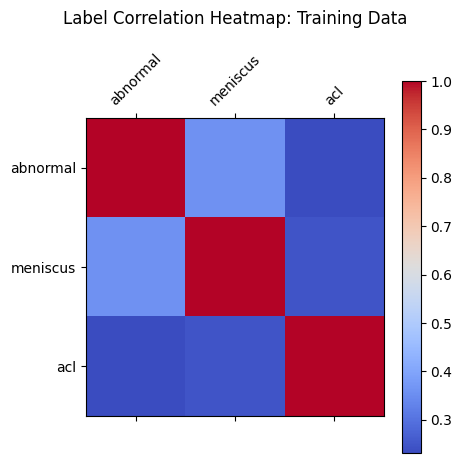

Label Correlation Matrix: Validation Data


,abnormal,meniscus,acl
abnormal,1.000000,0.448596,0.464016
meniscus,0.448596,1.000000,0.256903
acl,0.464016,0.256903,1.000000


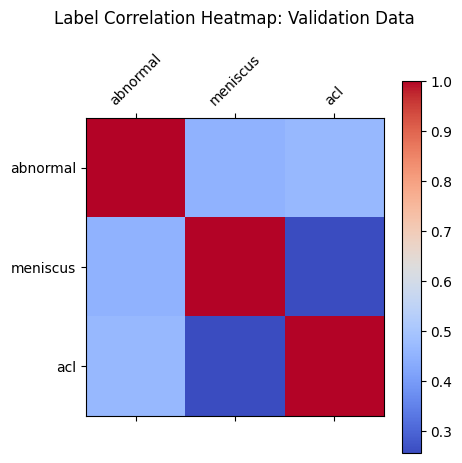

In [13]:
def analyze_label_correlation(labels_df, title):
    correlation_matrix = labels_df[['abnormal', 'meniscus', 'acl']].corr()
    print(f"Label Correlation Matrix: {title}")
    display(correlation_matrix)

    plt.matshow(correlation_matrix, cmap='coolwarm')
    plt.colorbar()
    plt.title(f"Label Correlation Heatmap: {title}", pad=20)
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

# Correlation Analysis for Training Labels
analyze_label_correlation(train_labels, "Training Data")

# Correlation Analysis for Validation Labels
analyze_label_correlation(valid_labels, "Validation Data")
